In [1]:
import scipy.io
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [6]:
tuple(1 for i in range(1, 6))

(1, 1, 1, 1, 1)

In [2]:
# Reshape train_tensor into [66, train_tensor.size(dim=0)/66, train_tensor.size(dim=1)]
def reshape_train_tensor(train_tensor):
    """
    Reshapes the train_tensor into [66, num_steps, num_features].
    Args:
        train_tensor: The original tensor of shape [total_steps, num_features].
    Returns:
        reshaped_tensor: Tensor of shape [66, num_steps, num_features].
    """
    num_trajectories = 66
    num_steps = train_tensor.size(0) // num_trajectories
    num_features = train_tensor.size(1)

    reshaped_tensor = train_tensor.view(num_trajectories, num_steps, num_features)
    return reshaped_tensor

def get_data_robot():
    #training data is 33 trajectories each executed 2 times -> 66 trajectories
    #normalising will make the trajectories not start at 0! 
    #can be inverted later!
    """
    Loads and normalizes robot training and testing data.
    Returns:
        train_tensor: Normalized training data as a torch tensor.
        test_tensor: Normalized testing data as a torch tensor.
    """
    # Load training data
    train_df = pd.read_csv("robot_train_data.csv")
    train_tensor = torch.tensor(train_df.values, dtype=torch.float32)

    # Normalize training data (column-wise min-max normalization)
    train_min = train_tensor.min(dim=0, keepdim=True).values
    train_max = train_tensor.max(dim=0, keepdim=True).values
    train_tensor = (train_tensor - train_min) / (train_max - train_min)

    num_trajectories = 66
    num_steps = train_tensor.size(0) // num_trajectories
    num_features = train_tensor.size(1)
    reshaped_tensor_train = train_tensor[:39930,:].view(num_trajectories, num_steps, num_features)


    # Load testing data
    test_df = pd.read_csv("robot_test_data.csv")
    test_tensor = torch.tensor(test_df.values, dtype=torch.float32)

    # Normalize testing data (column-wise min-max normalization)
    test_min = test_tensor.min(dim=0, keepdim=True).values
    test_max = test_tensor.max(dim=0, keepdim=True).values
    test_tensor = (test_tensor - test_min) / (test_max - test_min)

    num_trajectories = 6
    num_steps = test_tensor.size(0) // num_trajectories
    num_features = test_tensor.size(1)
    reshaped_tensor_test = test_tensor.view(num_trajectories, num_steps, num_features)


    return reshaped_tensor_train, reshaped_tensor_test

train_tensor, test_tensor = get_data_robot()
print(train_tensor.shape)
print(test_tensor.shape)    


torch.Size([66, 605, 12])
torch.Size([6, 606, 12])


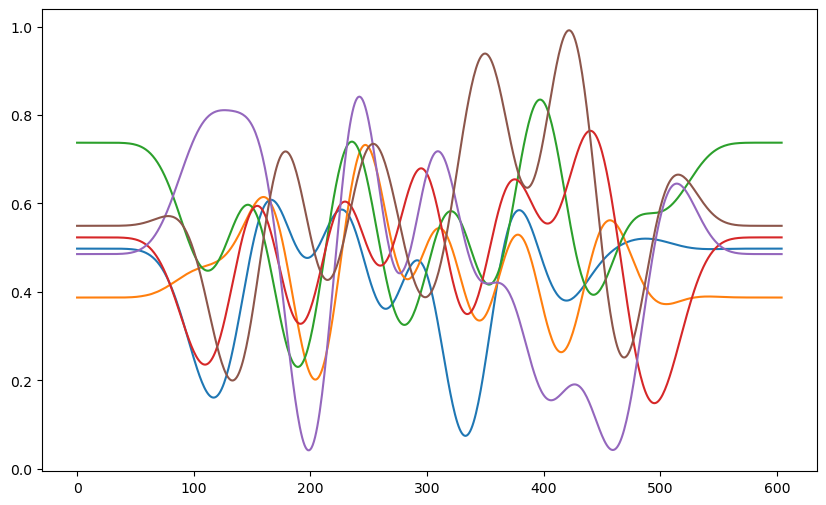

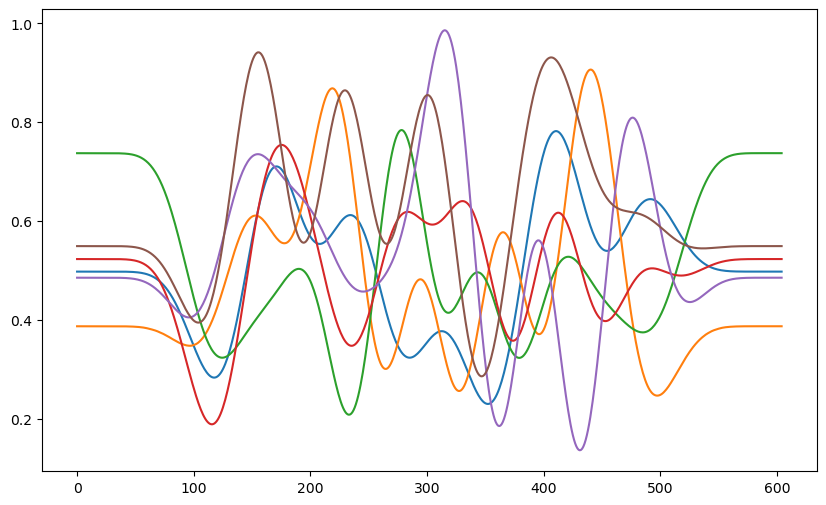

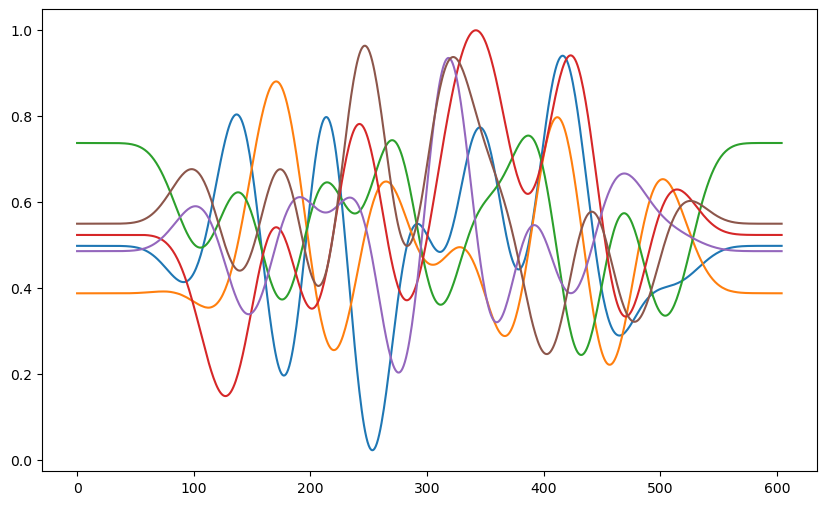

In [3]:
num_features = train_tensor.size(2)
time = range(train_tensor.size(1))  # Time steps
num_trajectories = 3  # Number of trajectories to plot
for traj_idx in range(min(num_trajectories, train_tensor.size(0))):
    plt.figure(figsize=(10, 6))
    for feature_idx in range(6,12):
        plt.plot(time, train_tensor[traj_idx, :, feature_idx].cpu().numpy(), label=f"Feature {feature_idx + 1}")